In [1]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = [r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_09_19-49-43.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_13_16-50-58.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_15_13-06-59.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_18_01-05-50.txt"]

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.
print (param_str)

data = [pd.read_csv(i, header=None, sep = "\t") for i in file]

# for j in range(0,len(data)):
#     print (data[j].head().to_string())
    
    
plt.rcParams['figure.figsize'] = (20, 5)  # Размер картинок

x = list(data[0][0])
y = list(data[0][1])

for i in range(0, len(data)):
    x[i] = list(data[i][0]/1000)
    y[i] = 1/((param_str[0] - data[i][1])*param_str[1]/data[i][1])*1000000

for i in range(0, len(data)):
    plt.plot(x[i], y[i])
plt.xlim(-100, 30000)
#plt.xscale('log')
plt.show()

[3.3, 68000]


<Figure size 2000x500 with 1 Axes>

   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN   100.053  0.050625
1  1     101.07   0.071375  193.617  1.90712     193.674     1.88525     687.5   1.33563
2  2    687.568    1.40488  707.335  1.90738     707.395     1.88025   1489.45   1.33563
3  3    1489.51    1.40475   1505.6  1.90762     1505.66       1.886   2475.62    1.3355
4  4    2475.68    1.40225  2490.36  1.90738     2490.42      1.8895   3606.83   1.33563
   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN   100.039  0.097625
1  1    101.054   0.134125  365.449    2.413     365.505     2.39288   463.751   2.21425
2  2    463.817    2.25738   494.16    2.413     494.216      2.4005   610.389   2.21437
3  3    610.455    2.25475  634.929  2.41337     634.986      2.3995   765.167   2.21413
4  4    765.232    2.

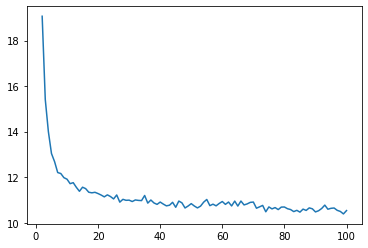

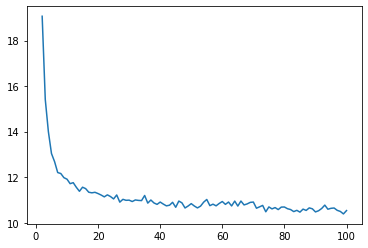

In [2]:
import neuro_lib_2
import numpy as np

res = [neuro_lib_2.on_off_impulse(i) for i in file]
for i in range(0, len(res)):
    print (res[i].head().to_string())

x_2 = res[i]['N'].drop(1)
y_2_on = res[i]['on_end_t'].drop(1)
y_2_off = res[i]['off_end_t'].drop(1)

for i in range(0, len(res)):
#     x_2[i] = res[i]['N'].drop(1)
#     y_2_on[i] = res[i]['on_end_t'].drop(1) - res[i]['on_start_t'].drop(1)
#     y_2_off[i] = res[i]['off_end_t'].drop(1) - res[i]['off_start_t'].drop(1)
    x_2[i] = res[i]['N'].drop(0)
    y_2_on[i] = res[i]['on_end_t'].drop(1) - res[i]['on_start_t'].drop(1)
    y_2_off[i] = res[i]['off_end_t'].drop(0) - res[i]['off_start_t'].drop(0)
#y_2_on_2 = y_2_on[0]

mnog = [1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1]
y_2_on_2 = y_2_on[0]
for i in range (0,len(y_2_on[0])):
      y_2_on_2.iloc[i] = (y_2_on[0].iloc[i]-np.exp(i/75))*0.99+0.5

plt.plot(x_2[0], y_2_on[0])
plt.show()
plt.plot(x_2[0], y_2_on_2)


# fig, ax1 = plt.subplots()
# ax1.set_facecolor('w') # установка фона графика
# ax2 = ax1.twinx() # позволяет вывести 2 графика на 1


# curve1 = ax1.scatter(x_2[0], y_2_on[0], s=4, label="on", color='r')
# curve2 = ax2.scatter(x_2[0], y_2_off[0], s=4, label="off", color='b')
# curves = [curve1, curve2]

# ax1.set_xlabel("Pulse number (N)")
# ax1.set_ylabel("Delay_on t (sec)", color = 'red')
# ax2.set_ylabel("Delay_off t (sec)", color = 'blue')
# plt.title("Duration on / off from pulse number")

plt.show()

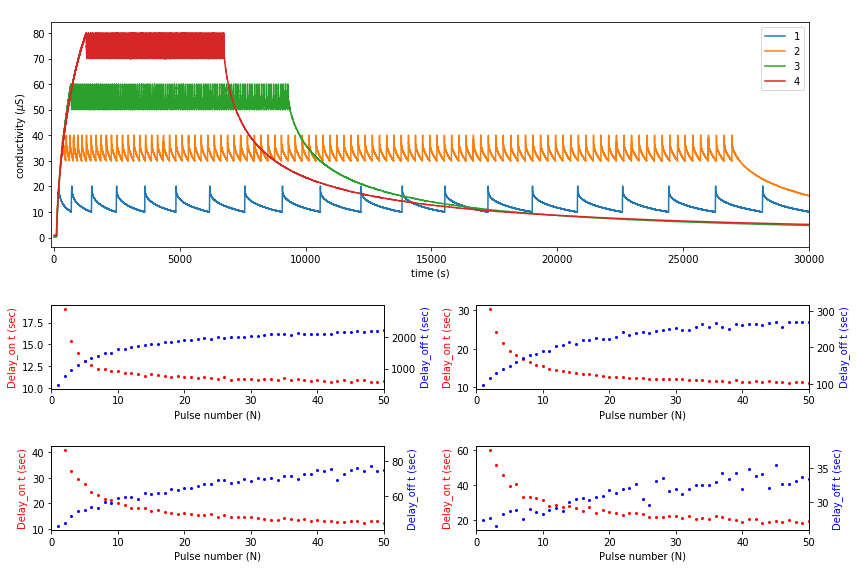

In [3]:
import matplotlib.pyplot as plt
 
gridsize = (4, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax4 = plt.subplot2grid(gridsize, (3, 0))
ax5 = plt.subplot2grid(gridsize, (3, 1))

lege = [1, 2, 3, 4]

for i in range(0, len(data)):
    ax1.plot(x[i], y[i], label = lege[i])
ax1.set_xlim(-100, 30000)
ax1.legend(loc=0)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('conductivity ($\mu$S)')
ax1.set_title(' ')

# первый график

ax2_2 = ax2.twinx() # позволяет вывести 2 графика на 1
curve1 = ax2.scatter(x_2[0], y_2_on[0], s=4, label="on", color='r')
curve2 = ax2_2.scatter(x_2[0], y_2_off[0], s=4, label="off", color='b')
curves = [curve1, curve2]
ax2.set_xlabel("Pulse number (N)")
ax2.set_ylabel("Delay_on t (sec)", color = 'red')
ax2_2.set_ylabel('Delay_off t (sec)', color = 'blue')
ax2.set_title(' ')
ax2.set_xlim(0, 50)

# второй график

ax3_2 = ax3.twinx()
curve1 = ax3.scatter(x_2[1], y_2_on[1], s=4, label="on", color='r')
curve2 = ax3_2.scatter(x_2[1], y_2_off[1], s=4, label="off", color='b')
curves = [curve1, curve2]
ax3.set_xlabel("Pulse number (N)")
ax3.set_ylabel("Delay_on t (sec)", color = 'red')
ax3_2.set_ylabel('Delay_off t (sec)', color = 'blue')
ax3.set_title(' ')
ax3.set_xlim(0, 50)

# третий график

ax4_2 = ax4.twinx()
curve1 = ax4.scatter(x_2[2], y_2_on[2], s=4, label="on", color='r')
curve2 = ax4_2.scatter(x_2[2], y_2_off[2], s=4, label="off", color='b')
curves = [curve1, curve2]
ax4.set_xlabel("Pulse number (N)")
ax4.set_ylabel("Delay_on t (sec)", color = 'red')
ax4_2.set_ylabel('Delay_off t (sec)', color = 'blue')
ax4.set_title(' ')
ax4.set_xlim(0, 50)

# четвертый график

ax5_2 = ax5.twinx()
curve1 = ax5.scatter(x_2[3], y_2_on[3], s=4, label="on", color='r')
curve2 = ax5_2.scatter(x_2[3], y_2_off[3], s=4, label="off", color='b')
curves = [curve1, curve2]
ax5.set_xlabel('Pulse number (N)')
ax5.set_ylabel('Delay_on t (sec)', color = 'red')
ax5_2.set_ylabel('Delay_off t (sec)', color = 'blue')
ax5.set_title(' ')
ax5.set_xlim(0, 50)


fig.tight_layout()
plt.show()

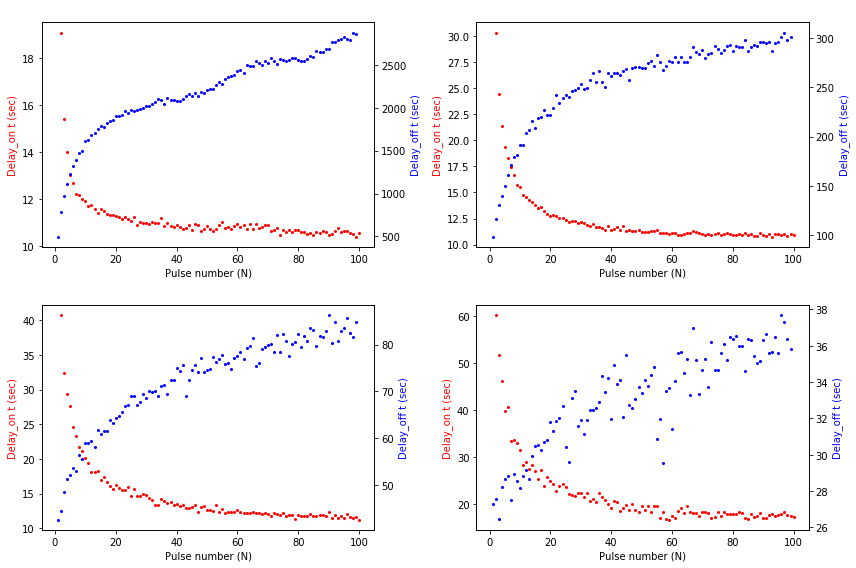

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8) # размер области с графиками

# первый график

ax1 = ax[0,0].twinx() # позволяет вывести 2 графика на 1
curve1 = ax[0,0].scatter(x_2[0], y_2_on[0], s=4, label="on", color='r')
curve2 = ax1.scatter(x_2[0], y_2_off[0], s=4, label="off", color='b')
curves = [curve1, curve2]

ax[0,0].set_xlabel("Pulse number (N)")
ax[0,0].set_ylabel("Delay_on t (sec)", color = 'red')
ax1.set_ylabel('Delay_off t (sec)', color = 'blue')
ax[0,0].set_title(' ')

# второй график

ax2 = ax[0,1].twinx()
curve1 = ax[0,1].scatter(x_2[1], y_2_on[1], s=4, label="on", color='r')
curve2 = ax2.scatter(x_2[1], y_2_off[1], s=4, label="off", color='b')
curves = [curve1, curve2]

ax[0,1].set_xlabel("Pulse number (N)")
ax[0,1].set_ylabel("Delay_on t (sec)", color = 'red')
ax2.set_ylabel('Delay_off t (sec)', color = 'blue')
ax[0,1].set_title(' ')

# третий график

ax3 = ax[1,0].twinx()
curve1 = ax[1,0].scatter(x_2[2], y_2_on[2], s=4, label="on", color='r')
curve2 = ax3.scatter(x_2[2], y_2_off[2], s=4, label="off", color='b')
curves = [curve1, curve2]

ax[1,0].set_xlabel("Pulse number (N)")
ax[1,0].set_ylabel("Delay_on t (sec)", color = 'red')
ax3.set_ylabel('Delay_off t (sec)', color = 'blue')
ax[1,0].set_title(' ')

# четвертый график

ax4 = ax[1,1].twinx()
curve1 = ax[1,1].scatter(x_2[3], y_2_on[3], s=4, label="on", color='r')
curve2 = ax4.scatter(x_2[3], y_2_off[3], s=4, label="off", color='b')
curves = [curve1, curve2]

ax[1,1].set_xlabel('Pulse number (N)')
ax[1,1].set_ylabel('Delay_on t (sec)', color = 'red')
ax4.set_ylabel('Delay_off t (sec)', color = 'blue')
ax[1,1].set_title(' ')


fig.tight_layout()

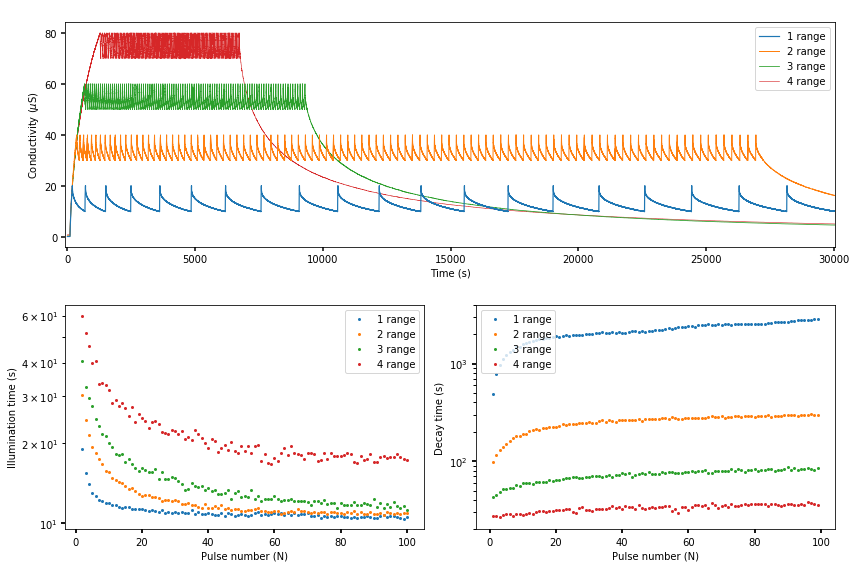

In [5]:
import matplotlib.pyplot as plt
import matplotlib
 
gridsize = (4, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=2)

lege = ['1 range', '2 range', '3 range', '4 range']

ax1.plot(x[3], y[3], label = lege[3], linewidth = 0.6, color = "#d62728")
ax1.plot(x[2], y[2], label = lege[2], linewidth = 0.8, color = "#2ca02c")
ax1.plot(x[1], y[1], label = lege[1], linewidth = 1, color = "#ff7f0e")
ax1.plot(x[0], y[0], label = lege[0], linewidth = 1.2, color = "#1f77b4")
ax1.set_xlim(-100, 30050)
#ax1.legend(reversed(handles), reversed(labels), title='Line', loc='upper left')
# ax1.legend(loc=0)
handles,labels = ax1.get_legend_handles_labels()
handles = [handles[3], handles[2],handles[1], handles[0]]
labels = [labels[3], labels[2], labels[1], labels[0]]
ax1.legend(handles, labels, loc = 'upper right')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Conductivity ($\mu$S)')
ax1.set_title(' ')
ax1.tick_params(axis = 'both', which = 'major', length = 4, width = 1.5)   #  Применяем параметры к обеим осям, Применяем параметры к основным делениям, Длинна делений, Ширина делений

# первый график

ax2.scatter(x_2[0], y_2_on_2, s=4, label="1 range")
ax2.scatter(x_2[1], y_2_on[1], s=4, label="2 range")
ax2.scatter(x_2[2], y_2_on[2], s=4, label="3 range")
ax2.scatter(x_2[3], y_2_on[3], s=4, label="4 range")
#ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_yscale('log')
ax2.set_xlabel("Pulse number (N)")
ax2.set_ylabel("Illumination time (s)")
ax2.set_title(' ')
#ax2.legend(loc = 'upper right')
ax2.legend()
#ax2.set_xlim(0, 50)
ax2.tick_params(axis = 'both', which = 'major', length = 4, width = 1.8)
ax2.tick_params(axis = 'both', which = 'minor', length = 3, width = 1)

# второй график

ax3.scatter(x_2[0], y_2_off[0], s=4, label="1 range")
ax3.scatter(x_2[1], y_2_off[1], s=4, label="2 range")
ax3.scatter(x_2[2], y_2_off[2], s=4, label="3 range")
ax3.scatter(x_2[3], y_2_off[3], s=4, label="4 range")
ax3.set_yscale('log')
ax3.set_xlabel("Pulse number (N)")
ax3.set_ylabel("Decay time (s)")
ax3.set_title(' ')
#ax3.legend(loc = 'upper right')
ax3.legend()
ax3.set_ylim(20, 4000)
ax3.tick_params(axis = 'both', which = 'major', length = 4, width = 1.8)
ax3.tick_params(axis = 'both', which = 'minor', length = 3, width = 1)

fig.tight_layout()
matplotlib.rcParams.update({'font.size': 13})  # устанавливает размер шрифта на всей картинке
#plt.show()
plt.savefig('3_v3.svg')

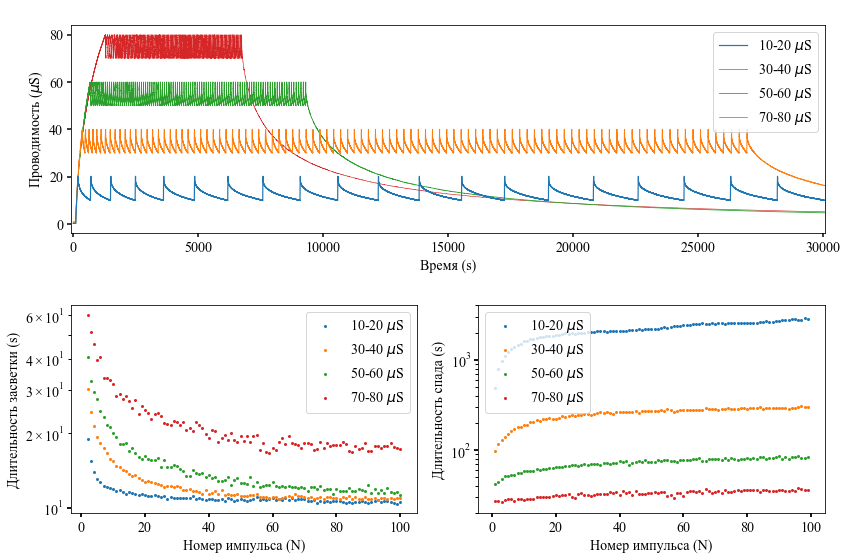

In [7]:
import matplotlib.pyplot as plt
import matplotlib

import matplotlib as mpl
mpl.rc('font',family='Times New Roman')  # выставление правильного шрифта
 
gridsize = (4, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=2)

lege = ['10-20 $\mu$S', '30-40 $\mu$S', '50-60 $\mu$S', '70-80 $\mu$S']

ax1.plot(x[3], y[3], label = lege[3], linewidth = 0.6, color = "#d62728")
ax1.plot(x[2], y[2], label = lege[2], linewidth = 0.8, color = "#2ca02c")
ax1.plot(x[1], y[1], label = lege[1], linewidth = 1, color = "#ff7f0e")
ax1.plot(x[0], y[0], label = lege[0], linewidth = 1.2, color = "#1f77b4")
ax1.set_xlim(-100, 30050)
#ax1.legend(reversed(handles), reversed(labels), title='Line', loc='upper left')
# ax1.legend(loc=0)
handles,labels = ax1.get_legend_handles_labels()
handles = [handles[3], handles[2],handles[1], handles[0]]
labels = [labels[3], labels[2], labels[1], labels[0]]
ax1.legend(handles, labels, loc = 'upper right')

ax1.set_xlabel('Время (s)')
ax1.set_ylabel('Проводимость ($\mu$S)')
ax1.set_title(' ')
ax1.tick_params(axis = 'both', which = 'major', length = 4, width = 1.5)   #  Применяем параметры к обеим осям, Применяем параметры к основным делениям, Длинна делений, Ширина делений

# первый график

ax2.scatter(x_2[0], y_2_on_2, s=4, label=lege[0])
ax2.scatter(x_2[1], y_2_on[1], s=4, label=lege[1])
ax2.scatter(x_2[2], y_2_on[2], s=4, label=lege[2])
ax2.scatter(x_2[3], y_2_on[3], s=4, label=lege[3])
#ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_yscale('log')
ax2.set_xlabel("Номер импульса (N)")
ax2.set_ylabel("Длительность засветки (s)")
ax2.set_title(' ')
#ax2.legend(loc = 'upper right')
ax2.legend()
#ax2.set_xlim(0, 50)
ax2.tick_params(axis = 'both', which = 'major', length = 4, width = 1.8)
ax2.tick_params(axis = 'both', which = 'minor', length = 3, width = 1)

# второй график

ax3.scatter(x_2[0], y_2_off[0], s=4, label=lege[0])
ax3.scatter(x_2[1], y_2_off[1], s=4, label=lege[1])
ax3.scatter(x_2[2], y_2_off[2], s=4, label=lege[2])
ax3.scatter(x_2[3], y_2_off[3], s=4, label=lege[3])
ax3.set_yscale('log')
ax3.set_xlabel("Номер импульса (N)")
ax3.set_ylabel("Длительность спада (s)")
ax3.set_title(' ')
#ax3.legend(loc = 'upper right')
ax3.legend()
ax3.set_ylim(20, 4000)
ax3.tick_params(axis = 'both', which = 'major', length = 4, width = 1.8)
ax3.tick_params(axis = 'both', which = 'minor', length = 3, width = 1)

fig.tight_layout()
matplotlib.rcParams.update({'font.size': 14})  # устанавливает размер шрифта на всей картинке
#plt.show()
plt.savefig('3_v5.svg')